## **Loss, Cost, Gradients**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv("https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/housing_data.csv")
df.head()

,Bedrooms,Area,City_Distance,Age,Price
0,1,26.184098,1286.68,67,96004.804557
1,1,34.866901,1855.25,30,92473.722570
2,1,36.980709,692.09,24,98112.519940
3,1,17.445723,1399.49,66,92118.326874
4,1,52.587646,84.65,3,98976.653176


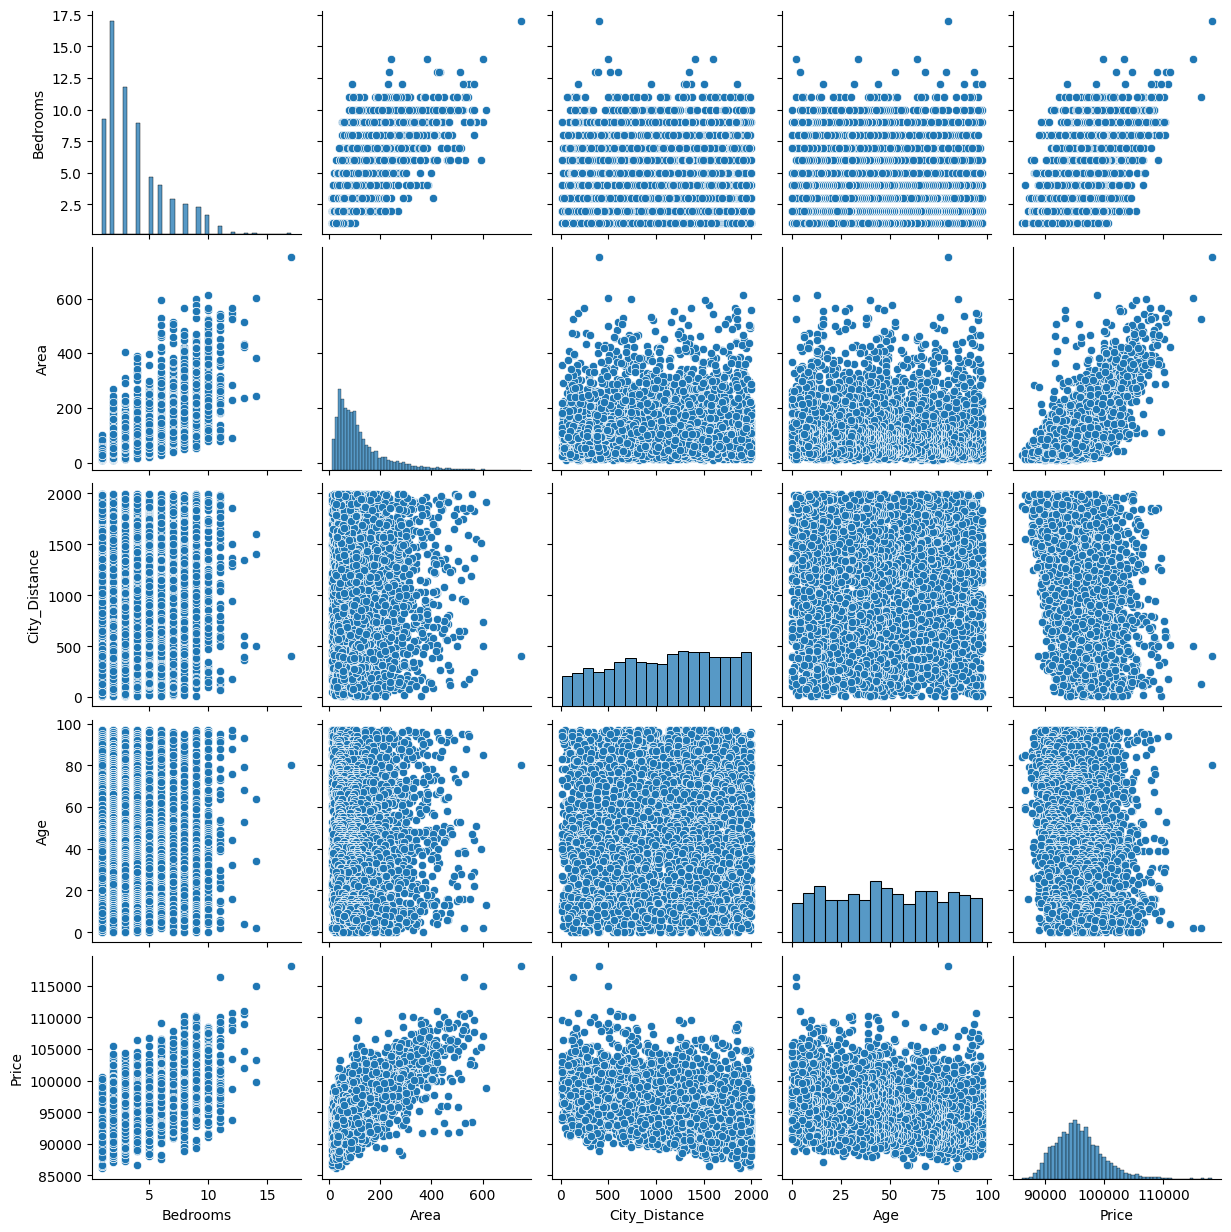

In [2]:
import seaborn as sns

sns.pairplot(df)

In [3]:
df.drop("Age", axis = 1, inplace = True)

In [6]:
## Create X and y
X = df.drop("Price", axis = 1)
y = df["Price"]

## Design matrix XD
XD = X.copy()
XD["Intercept"] = 1

In [19]:
## weights is the same slopes
## bias is the same concept as y-intercept

w = np.array([100000, 1000, -8, 1100000])  ## these are NOT the optimal weights (gradient is NOT ZERO)

In [20]:
## For LR the estimates are obtained by multiplying hw = X.dot(w)
hw = XD.dot(w)
hw

,0
0,1.215891e+06
1,1.220025e+06
2,1.231444e+06
3,1.206250e+06
4,1.251910e+06
...,...
4303,2.164769e+06
4304,1.904581e+06
4305,1.886881e+06
4306,1.214024e+06


In [21]:
## loss function
#### in LR the default loss function is the "squared error"
loss = (y - hw)**2
loss

,0
0,1.254144e+12
1,1.271372e+12
2,1.284440e+12
3,1.241289e+12
4,1.329256e+12
...,...
4303,4.252098e+12
4304,3.257614e+12
4305,3.215126e+12
4306,1.256886e+12


In [22]:
## cost function (sum or an average)
#### SSE (cost function) - used
#### MSE = SSE/n (cost function)
Jw = loss.mean() ## mse
Jw

np.float64(2318099010328.3276)

In [23]:
## norms
np.linalg.norm(y - hw)**2 / 4307

np.float64(2318637226954.8267)

For LR the gradient of the cost function is defined as:

$$ 2*X'(Xw - y) $$

In [27]:
## gradient of the cost function
D_Jw = 2*XD.T.dot(XD.dot(w) - y)
D_Jw

,0
Bedrooms,-0.000006
Area,-0.000197
City_Distance,-0.001787
Intercept,-0.000002


In [26]:
## for LR we can get there in one STEP
## (X'X)^-1 X'y
w = np.linalg.inv(XD.T.dot(XD)).dot(XD.T.dot(y))
w

array([ 1.29483542e+02,  2.53205184e+01, -2.90478157e+00,  9.53739940e+04])

## **Neural Network**

Use tensorflow

* Input
* 1 hidden layer (10 neurons)
* Output

In [31]:
## split the data into training / test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 630)

## STANDARDIZE (gradient descent works best with values close to zero)
from sklearn.preprocessing import StandardScaler

## instance
scaler = StandardScaler()
scaler.fit(X_train)


X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
## NEURAL NETWORK

from tensorflow.keras.models import Sequential ## feed-forward
from tensorflow.keras.layers import Input, Dense

model = Sequential()
model.add(Input(shape = (X_train.shape[1],)))  ## input layer
model.add(Dense(10, activation = 'relu'))      ## hidden layer
model.add(Dense(1, activation = 'linear'))     ## output layer

In [35]:
## summary
model.summary()  ## weights and biases

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
## input - hidden: 3*10 (weights) + 10 biases     hidden - output: 10*1 (weights) + 1

In [39]:
## compile
## optimizer: tell the network the gradient descent optimizer
## loss: cost function to use
## metrics
model.compile(optimizer = "adam", loss = "mse", metrics =['mae'])

In [40]:
## fit
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9185518592.0000 - mae: 95759.8203 - val_loss: 9166686208.0000 - val_mae: 95659.8438
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9179430912.0000 - mae: 95734.0000 - val_loss: 9166434304.0000 - val_mae: 95658.5156
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9170755584.0000 - mae: 95682.5391 - val_loss: 9166089216.0000 - val_mae: 95656.7266
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9198825472.0000 - mae: 95827.3750 - val_loss: 9165633536.0000 - val_mae: 95654.3594
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9170273280.0000 - mae: 95681.9531 - val_loss: 9165061120.0000 - val_mae: 95651.3438
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9170295808.0000 - mae: 95683.3516 - val_loss: 9164371968.0000 - val_mae: 95647.7500
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9182402560.0000 - mae: 95745.9844 - val_loss: 9163573248.0000 - val_mae: 956

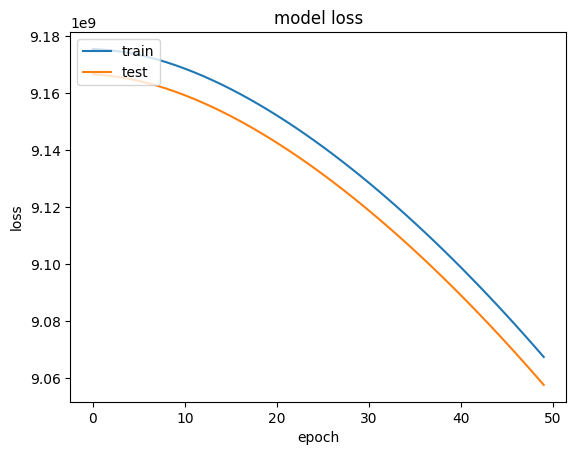

In [41]:
## plot the learning curve (how is this learning?)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9063583744.0000 - mae: 95119.4062 - val_loss: 9053978624.0000 - val_mae: 95067.9688
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9066606592.0000 - mae: 95140.9844 - val_loss: 9050178560.0000 - val_mae: 95047.9453
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9080433664.0000 - mae: 95207.1406 - val_loss: 9046325248.0000 - val_mae: 95027.6172
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9043700736.0000 - mae: 95019.1797 - val_loss: 9042412544.0000 - val_mae: 95006.9922
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9046816768.0000 - mae: 95032.4375 - val_loss: 9038464000.0000 - val_mae: 94986.1562
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9030881280.0000 - mae: 94951.4297 - val_loss: 9034456064.0000 - val_mae: 94965.0000
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9039547392.0000 - mae: 94996.1484 - val_loss: 9030404096.0000 - val_mae: 949

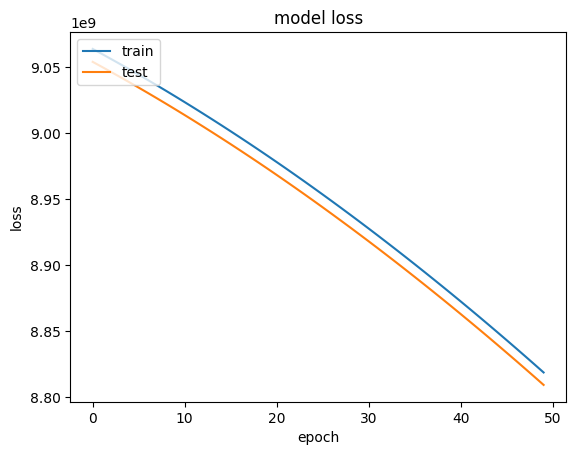

In [43]:
## plot the learning curve (how is this learning?)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()